## Visualization of CNN - Heatmap 🌈
모델이 학습한 특징, 근거를 시각화 하는 것, 예를들어 '왜 암으로 판별 했는지', '왜 고양이로 판단했는지' 등등 

- 시각화에 유용한 기법 (3)
  - Heatmap of class activation 

In [ ]:
from tensorflow.keras.applications import VGG16

model = VGG16(weights='imagenet')

In [ ]:
from keras.preprocessing import image 
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

# Path to our target image 
img_path  = './creative_commons_elephant.jpg'

# 'img' is a PIL image of size 224 X 224
img = image.load_img(img_path, target_size=(224,224))

In [ ]:
# 'x' is a float32 Numpy array of shape (224,224,3)
# add a dimension to transform array into a 'batch'
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

# preprocess the batch 
x = preprocess_input(x)

In [ ]:
# class 예측 (아프리카 코끼리: 89.5%, 코끼리: 9%, 인도 코끼리: 0.4%)
preds = model.predict(x)
print('Predicted: ', decode_predictions(preds, top=3)[0])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Predicted:  [('n02504458', 'African_elephant', 0.89544886), ('n01871265', 'tusker', 0.09967599), ('n02504013', 'Indian_elephant', 0.004639555)]


In [ ]:
# class 예측 
preds = model.predict(x)
print('Predicted: ', decode_predictions(preds, top=3)[0])

Predicted:  [('n02504458', 'African_elephant', 0.89544886), ('n01871265', 'tusker', 0.09967599), ('n02504013', 'Indian_elephant', 0.004639555)]


In [ ]:
np.argmax(preds[0])

386

In [ ]:
from tensorflow.keras import backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

In [ ]:
# Grad-CAM 알고리즘 설정 
african_elephant_output = model.output[:, 386]
last_conv_layer = model.get_layer('block5_conv3')
grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0,1,2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
  conv_layer_output_value[:,:, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)

In [ ]:
import matplotlib.pyplot as plt

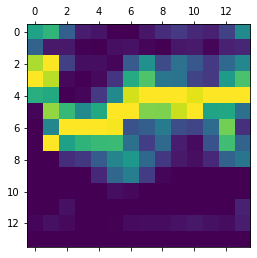

In [ ]:
# Heatmap post-processing

heatmap = np.maximum(heatmap,0)
heatmap /= np.max(heatmap, 0)
plt.matshow(heatmap)

In [ ]:
# 원본이미지에 heatmap 덧붙이기 

import cv2 

img = cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap * 0.4 + img

# 저장 
cv2.imwrite('./elephantheat.jpg', superimposed_img)

True